# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 2: Linear and k-NN Regression


**Harvard University**<br/>
**Fall 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">


In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.

Names of people you have worked with goes here: 

<hr style="height:2pt">

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

<div class="theme"> Predicting Taxi Pickups in NYC </div>

In this homework, we will explore k-nearest neighbor and linear regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in the file `dataset_1.csv`.  You will need to separate it into training and test sets. The first column contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded in NYC during Jan 2015.

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pickups at that time. The models will be fitted to the training set and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric.

<div class="exercise"> <b> Question 1  [25 pts]</b> </div>

**1.1**. Use pandas to load the dataset from the csv file `dataset_1.csv` into a pandas data frame.  Use the `train_test_split` method from `sklearn` with a `random_state` of 42 and a `test_size` of 0.2 to split the dataset into training and test sets.  Store your train set dataframe in the variable `train_data`.  Store your test set dataframe in the variable `test_data`.


**1.2**. Generate a scatter plot of the training data points with clear labels on the x and y axes. The time of the day on the x-axis and the number of taxi pickups on the y-axis.  Make sure to title your plot.

**1.3**. Does the pattern of taxi pickups make intuitive sense to you? 


### Answers

**1.1 Use pandas to load the dataset from the csv file ...**

In [3]:
txdf = pd.read_csv("data/dataset_1.csv")
txdf.head()

TimeMin  PickupCount
0    860.0         33.0
1     17.0         75.0
2    486.0         13.0
3    300.0          5.0
4    385.0         10.0

In [4]:
train_data, test_data = train_test_split(txdf, random_state=42, test_size=0.2)



In [5]:
print("train data contains\t %i entries\ntest data contains\t %i entries" % (len(train_data), len(test_data)))


train data contains	 1000 entries
test data contains	 250 entries


**1.2 Generate a scatter plot of the training data points**

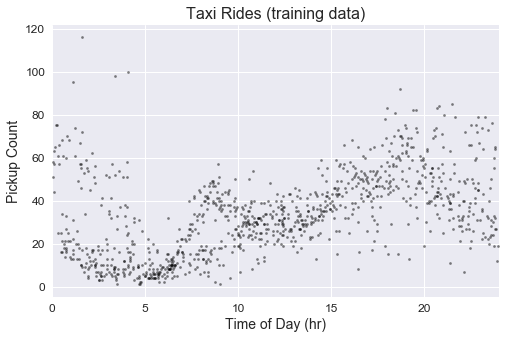

In [6]:
fh = plt.figure()
plt.scatter(train_data['TimeMin']/60, train_data['PickupCount'], s=5, color='k', alpha=0.5)
ah=plt.gca()
ah.set_xlabel('Time of Day (hr)', fontsize=14)
ah.set_ylabel('Pickup Count', fontsize=14)
ah.set_title('Taxi Rides (training data)', fontsize=16)
ah.set_xlim(0,24)
ah.tick_params(labelsize=12)
fh.set_size_inches(8, 5)


**1.3 Discuss your results. Does the pattern of taxi pickups make intuitive sense to you?**

I think the patter is intuitive if we consider that the scatter plot is sort of superimposing two distinct patterns of taxi pickups. One pattern is likely generated by workday patterns of transit (probably MON-FRI), with local peaks early in the day at 9:00 and 17:00-19:00 and local minimums at midday and overnight. The pattern is likely corresponds to days off (probably SAT-SUN). There is a distinct lower band at 8:00-9:00 that seems to skip the early morning rush hour and there is also a much longer tail overnight, with some cabs showing peaks of activity 22:00-2:00. This could be people taking cabs home after drinking in the evenings. To really tease the data apart, it would be helpful to have information about the day of the week, time of year, and weather conditions.

<div class="exercise"> <b>Question 2 [25 pts]</b> </div>

In lecture we've seen k-Nearest Neighbors (k-NN) Regression, a non-parametric regression technique.  In the following problems please use built in functionality from `sklearn` to run k-NN Regression. 


**2.1**. Choose `TimeMin` as your feature variable and `PickupCount` as your response variable.  Create a dictionary of `KNeighborsRegressor` objects and call it `KNNModels`.  Let the key for your `KNNmodels` dictionary be the value of $k$ and the value be the corresponding `KNeighborsRegressor` object. For $k \in \{1, 10, 75, 250, 500, 750, 1000\}$, fit k-NN regressor models on the training set (`train_data`). 

**2.2**.  For each $k$ on the training set, overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` with a scatter plot of **predictions** for `PickupCount` vs  `TimeMin`.  Do the same for the test set.  You should have one figure with 2 x 7 total subplots; for each $k$ the figure should have two subplots, one subplot for the training set and one for the test set. 

**Hints**:
1. Each subplot should use different color and/or markers to distinguish k-NN regression prediction values from the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  


**2.3**. Report the $R^2$ score for the fitted models on both the training and test sets for each $k$ (reporting the values in tabular form is encouraged).

**2.4**. Plot, in a single figure, the $R^2$ values from the model on the training and test set as a function of $k$.  

**Hints**:
1. Again, the figure must have axis labels and a legend.
2. Differentiate $R^2$ visualization on the training and test set by color and/or marker.
3. Make sure the $k$ values are sorted before making your plot.

**2.5**. Discuss the results:

1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  
2. What does an $R^2$ score of $0$ mean?  
3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?
4. Do the training and test $R^2$ plots exhibit different trends?  Describe.  
5. How does the value of $k$ affect the fitted model and in particular the training and test $R^2$ values?
6. What is the best value of $k$ and what are the corresponding training/test set $R^2$ values?

### Answers

**2.1 Choose `TimeMin` as your feature variable and `PickupCount` as your response variable.  Create a dictionary ... **

In [7]:
# create dictionary of kNN objects
k_vals = [1,10,75,250,500,750,1000]
KNNModels = {k:KNeighborsRegressor(n_neighbors=k) for k in k_vals}
for key in KNNModels.keys():
    KNNModels[key].fit(train_data['TimeMin'].values.reshape(-1,1), train_data['PickupCount'])
    

**2.2 For each $k$ on the training set, overlay a scatter plot ... **

Text(0.5,0.98,'Comparison of K-Neighbors Prediction for Training and Test Data')

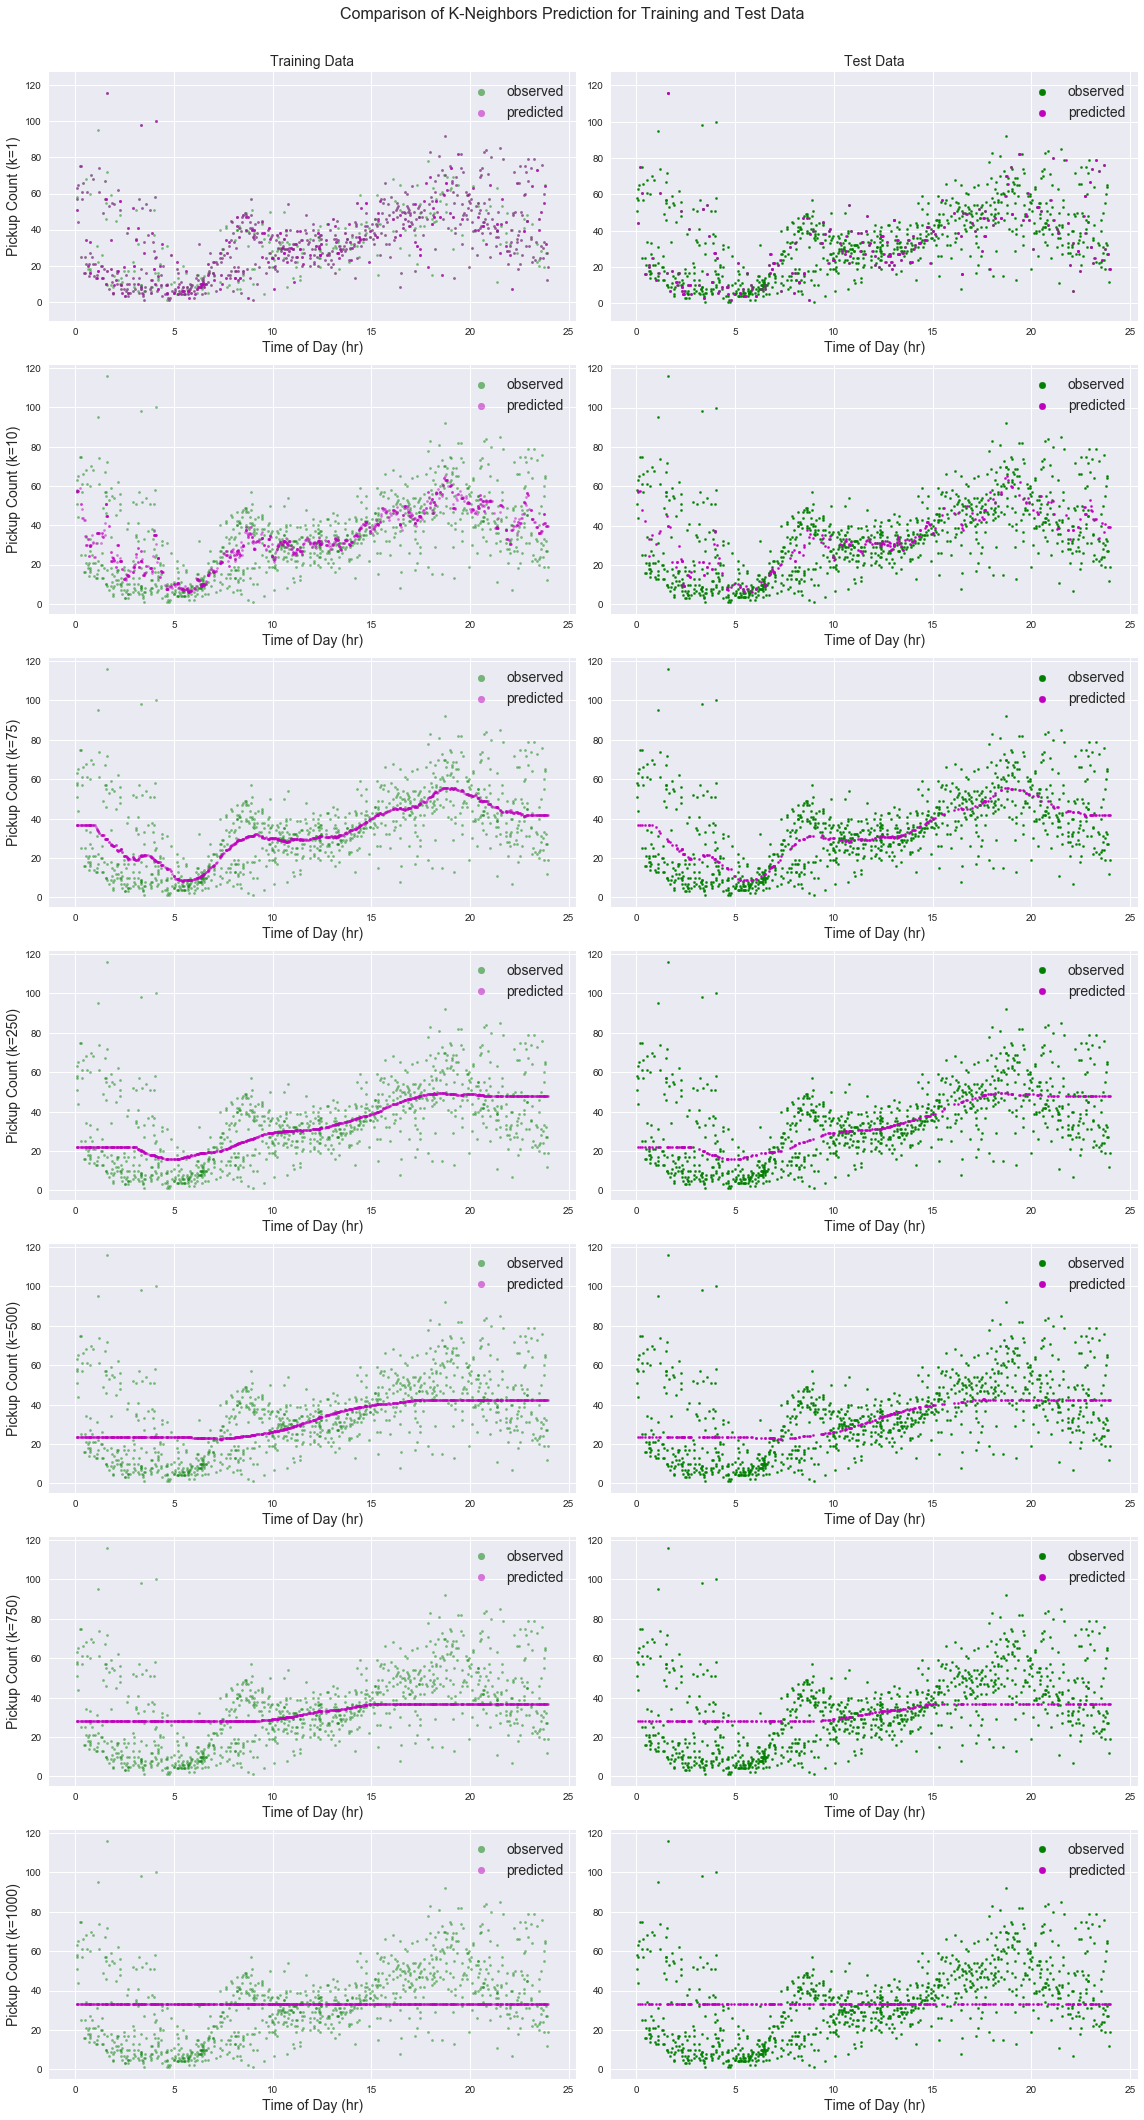

In [8]:
plt.figure
i=0
for key in KNNModels.keys():
      
    i+=1
    plt.subplot(7,2,i)
    plt.scatter(train_data['TimeMin']/60, train_data['PickupCount'], s=5, color='g', label="observed", alpha=0.5)
    p_train = KNNModels[key].predict(train_data['TimeMin'].values.reshape(-1,1))
    plt.scatter(train_data['TimeMin']/60, p_train, s=5, color='m', label="predicted", alpha=0.5)
    plt.ylabel("Pickup Count (k=" + str(key) + ")", fontsize=14)
    plt.xlabel("Time of Day (hr)", fontsize=14)
    plt.legend(markerscale=3, fontsize=14)
    if key==1:
        plt.title('Training Data', fontsize=14)
    i+=1
    plt.subplot(7,2,i)
    plt.scatter(train_data['TimeMin']/60, train_data['PickupCount'], s=5, color='g', label="observed")
    p_test = KNNModels[key].predict(test_data['TimeMin'].values.reshape(len(test_data),1))
    plt.scatter(test_data['TimeMin']/60, p_test, s=5, color='m', label="predicted")
    plt.xlabel("Time of Day (hr)", fontsize=14)
    plt.legend(markerscale=3, fontsize=14)
    if key==1:
        plt.title('Test Data', fontsize=14)
    

plt.xlabel("Time of Day (hr)")
plt.gcf().set_size_inches(16, 30)
plt.gcf().tight_layout()
plt.subplots_adjust(top=0.95)
plt.gcf().suptitle('Comparison of K-Neighbors Prediction for Training and Test Data', fontsize=16)

In [9]:
p_train = KNNModels[1].predict(train_data['TimeMin'].values.reshape(-1,1))
residuals = p_train - train_data.PickupCount

**2.3 Report the $R^2$ score for the fitted models ... **

In [10]:
r2_vals = []
for key in KNNModels.keys():
    r2_dict ={
        'k_val': 0,
        'r2_train': 0,
        'r2_test': 0,
    }
    r2_dict['k_val'] = key
    p_train = KNNModels[key].predict(train_data['TimeMin'].values.reshape(len(train_data),1))
    r2_dict['r2_train'] = r2_score(train_data['PickupCount'], p_train)
    p_test = KNNModels[key].predict(test_data['TimeMin'].values.reshape(len(test_data),1))
    r2_dict['r2_test'] = r2_score(test_data['PickupCount'], p_test)
    r2_vals.append(r2_dict)
    
r2_df = pd.DataFrame.from_dict(r2_vals)
r2_df.head(len(KNNModels))


k_val   r2_test  r2_train
0      1 -0.418932  0.712336
1     10  0.272068  0.509825
2     75  0.390310  0.445392
3    250  0.340341  0.355314
4    500  0.270321  0.290327
5    750  0.164909  0.179434
6   1000 -0.000384  0.000000

**2.4 Plot, in a single figure, the $R^2$ values from the model on the training and test set as a function of $k$**

Text(0,0.5,'$R^2$')

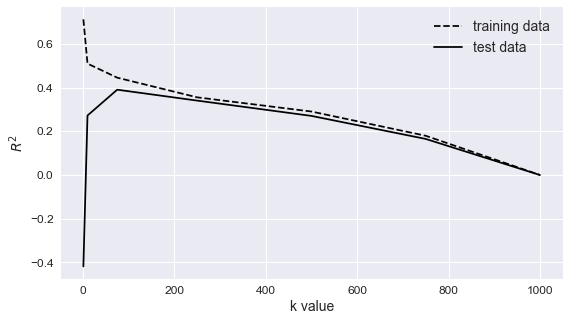

In [11]:
plt.figure(figsize=(9,5))
plt.plot(k_vals, r2_df['r2_train'], label='training data', color='k', ls='--')
plt.plot(k_vals, r2_df['r2_test'], label='test data', color='k', ls='-')
ah=plt.gca()
ah.legend(fontsize=14)
ah.tick_params(labelsize=12)
ah.set_xlabel('k value', fontsize=14)
ah.set_ylabel('$R^2$', fontsize=14)

**2.5 Discuss the results**

1. For a k-NN regression model that uses $k = n$, the predicted value of the response var equal to mean response in the training set for every value of the predictor.
2. $R^2=0$ means that the error your model is equal to the error of model $f(x)=\bar{y}$, meaning that the predictive value of the model is no better than simply predicting the mean value of the response variable for all values of the predictors.
3. In our dataset, $R^2<0$ for $k=1$. This means that our model is arbitrarily worse than the mean model. The reason is because our model is overfitted at $k=1$ and is most likely being dominated by noise. 
4. They exhibit opposite trends at low values of $k$ and the same trend at high values of $k$.
5. The $R^2$ value is high for low values of $k$ in the training set because the model is trained to fit the noise in our data since we sample too few neighbors to average out the local noise. This improves the fit to the training data because the model succeeds at predicting the noise in this particular data set. Because noise uncorrelated between the test and training data sets, it performs poorly when used to predict the test set at low values of $k$. As $k$ gets large, the two functions start to converge on the sample mean of the training data set.
6. The best value from this set is at $k=250$. For the test data, $R^2=0.34$, and for the training data	$k=0.36$

<div class="exercise"> <b> Question 3 [25 pts] </b></div>

We next consider simple linear regression, which we know from lecture is a parametric approach for regression that assumes that the response variable has a linear relationship with the predictor.  Use the `statsmodels` module for Linear Regression. This module has built-in functions to summarize the results of regression and to compute confidence intervals for estimated regression parameters.  

**3.1**. Again choose `TimeMin` as your predictor and `PickupCount` as your response variable.  Create a `OLS` class instance and use it to fit a Linear Regression model on the training set (`train_data`).  Store your fitted model in the variable `OLSModel`.

**3.2**. Re-create your plot from 2.2 using the predictions from `OLSModel` on the training and test set. You should have one figure with two subplots, one subplot for the training set and one for the test set.

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  


**3.3**. Report the $R^2$ score for the fitted model on both the training and test sets.

**3.4**. Report the slope and intercept values for the fitted linear model.  

**3.5**. Report the $95\%$ confidence interval for the slope and intercept.

**3.6**. Create a scatter plot of the residuals ($e = y - \hat{y}$) of the linear regression model on the training set as a function of the predictor variable (i.e. `TimeMin`). Place on your plot a horizontal line denoting the constant zero residual.  

**3.7**. Discuss the results:

1. How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?
2. What does the sign of the slope of the fitted linear model convey about the data?  
3. Based on the $95\%$ confidence interval, do you consider the estimates of the model parameters to be reliable?  
4. Do you expect $99\%$ confidence intervals for the slope and intercept to be tighter or wider than the $95\%$ confidence intervals? Briefly explain your answer.  
5. Based on the residuals plot that you made, discuss whether or not the assumption of linearity is valid for this data.
6. Based on the data structure, what restriction on the model would you put at the endpoints (at $x\approx0$ and $x\approx1440$)?   What does this say about the linearity assumption?


### Answers

**3.1 Again choose `TimeMin` as your predictor and `PickupCount` as your response variable.  Create a `OLS` class instance ... **

In [12]:
response = train_data['PickupCount']
training_predictor = train_data['TimeMin']
training_predictor = sm.add_constant(training_predictor)
OLSModel = OLS(response, training_predictor)
OLSModel = OLSModel.fit()
OLSModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PickupCount   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     320.4
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           2.34e-62
Time:                        19:06:31   Log-Likelihood:                -4232.9
No. Observations:                1000   AIC:                             8470.
Df Residuals:                     998   BIC:                             8480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.7506      1.058     15.838      0.000      14.675      18.826
TimeMin        0.0233      0.001     17.900      0.000       0.021       0.026
==============================================================================
Omnibus:                      203.688   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              462.910
Skew:                           1.111   Prob(JB):                    3.02e-101
Kurtosis:                       5.485   Cond. No.                     1.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**3.2 Re-create your plot from 2.2 using the predictions from `OLSModel` on the training and test set ... **

Text(0.5,0.98,'Comparison of OLS Prediction for Training and Test Data')

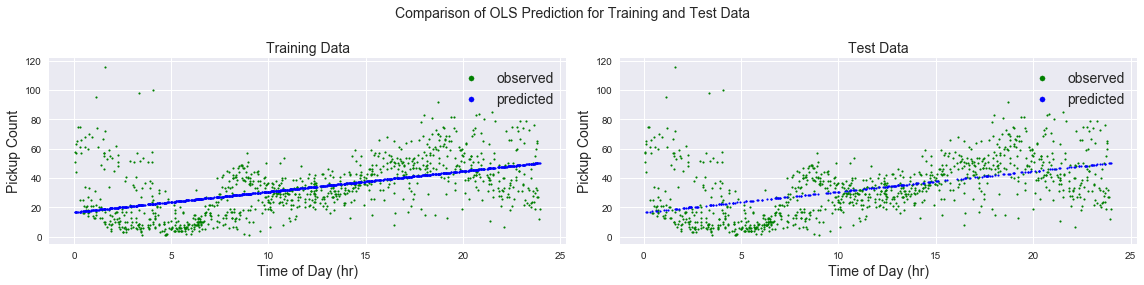

In [13]:

      
# training data plot
plt.subplot(1,2,1)
plt.scatter(train_data['TimeMin']/60, train_data['PickupCount'], s=3, color='g', label="observed")
pred_train = OLSModel.predict(training_predictor)
plt.scatter(train_data['TimeMin']/60, pred_train, s=3, color='b', label="predicted")
plt.ylabel("Pickup Count", fontsize=14)
plt.legend(fontsize=14, markerscale=3)
plt.title('Training Data', fontsize=14)
plt.xlabel("Time of Day (hr)", fontsize=14)

# training data plot
plt.subplot(1,2,2)
plt.scatter(train_data['TimeMin']/60, train_data['PickupCount'], s=3, color='g', label="observed")
test_predictor = test_data['TimeMin']
test_predictor = sm.add_constant(test_predictor)
pred_test = OLSModel.predict(test_predictor)
plt.scatter(test_data['TimeMin']/60, pred_test, s=3, color='b', label="predicted")
plt.ylabel("Pickup Count", fontsize=14)
plt.legend(fontsize=14, markerscale=3)
plt.title('Test Data', fontsize=14)   
plt.xlabel("Time of Day (hr)", fontsize=14)

# format fig
plt.gcf().set_size_inches(16, 4)
plt.gcf().tight_layout()
plt.subplots_adjust(top=0.8)
plt.gcf().suptitle('Comparison of OLS Prediction for Training and Test Data', fontsize=14)

**3.3 Report the $R^2$ score for the fitted model on both the training and test sets. **

In [14]:
r2_training = r2_score(train_data["PickupCount"], pred_train)
r2_test = r2_score(test_data["PickupCount"], pred_test)
print("OLS Training data fit,\t R" + f'\N{SUPERSCRIPT TWO}' + "=%.2f\n" % r2_training)
print("OLS Test data fit,\t R" + f'\N{SUPERSCRIPT TWO}' + "=%.2f\n" % r2_test)

OLS Training data fit,	 R²=0.24

OLS Test data fit,	 R²=0.24



**3.4 Report the slope and intercept values for the fitted linear model.  **

In [15]:
print("slope = %.2f, \t intercept = %.2f\n" % (OLSModel.params.TimeMin, OLSModel.params.const))

slope = 0.02, 	 intercept = 16.75



**3.5 Report the $95\%$ confidence interval for the slope and intercept.**

In [16]:
ci95 = OLSModel.conf_int()
ci95.columns = ["ci95_interval_low_bound", "ci95_interval_upper_bound"]
ci95.head()

ci95_interval_low_bound  ci95_interval_upper_bound
const                  14.675141                  18.826062
TimeMin                 0.020777                   0.025893

**3.6 Create a scatter plot of the residuals**

Text(0.5,0,'Time of Day (hr)')

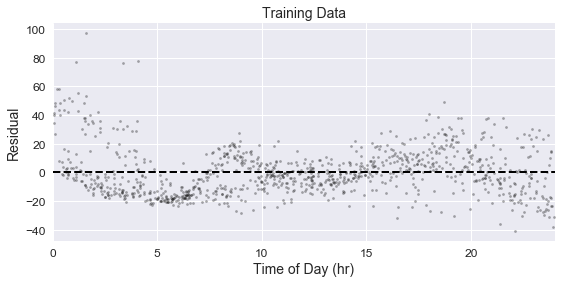

In [17]:
# your code here
fh = plt.figure(figsize=(9,4))
plt.scatter(train_data['TimeMin']/60, OLSModel.resid, s=5, c='k', alpha=0.33)
plt.plot((0,24), (0,0), c='k', ls='--', lw=2)
ah=plt.gca()
ah.tick_params(labelsize=12)
ah.set_xlim(0,24)
plt.ylabel("Residual", fontsize=14)
plt.title('Training Data', fontsize=14)
plt.xlabel("Time of Day (hr)", fontsize=14)


**3.7 Discuss the results:**

1. The $R^2$ score for the linear model (0.24) is lower than the best $R^2$ value obtained with k-NN regression (0.34)
2. The sign of the slope suggests that the Pickup Count generally increases with the time of day. This makes sense intuitively because we expect more people to be at home/asleep at night and out and about during the day.
3. Based on the $95\%$ confidence interval, I wouldn't expect the model to change qualitatively (only by a few percentage points).  
4. The $99\%$ confidence intervals will, by definition, be broader than the $95\%$ confidence interval because it is the interval of the distribution of parameter estimates that contains $99\%$ of the area. If there is any spread to the distributions, the $99\%$ confidence intervals should be broader and cannot be narrower than the $95\%$ confidence interval.
5. The relationship between Pickup Count and Time of Day does not appear to be linear, because the residuals are not randomly dispersed around $0$. This suggests that there is still structure left to the data.
6. Because we are looking at Pickup Count as a function of Time of Day, our model should be cyclical. Modeling the relationship linearly suggests that we expect Pickup Count at 0 and 1440 to be maximally different from one another. A more accurate model would take into account that our time points at 0 and 1440 should be the same distance from one another as 0 and 1.

<div class="theme"> Outliers </div>

You may recall from lectures that OLS Linear Regression can be susceptible to outliers in the data.  We're going to look at a dataset that includes some outliers and get a sense for how that affects modeling data with Linear Regression.  **Note, this is an open-ended question, there is not one correct solution (or one correct definition of an outlier).**


<div class="exercise"><b> Question 4 [25 pts] </b></div>




**4.1**. We've provided you with two files `outliers_train.txt` and `outliers_test.txt` corresponding to training set and test set data.  What does a visual inspection of training set tell you about the existence of outliers in the data?

**4.2**. Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create a Linear Regression model on the training set data.  Store your model in the variable `OutlierOLSModel`.

**4.3**. You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?

**4.4**  In CS109 we're strong believers that creating heuristic models is a great way to build intuition. In that spirit, construct an approximate algorithm to find the 3 outlier candidates in the training data by taking advantage of the Linear Regression residuals. Place your algorithm in the function `find_outliers_simple`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  The return value should be a list `outlier_indices` representing the indices of the 3 outliers in the original datasets you passed in.  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeSimpleModel`.


**4.5** Create a figure with two subplots: the first is a scatterplot where the color of the points denotes the outliers from the non-outliers in the training set, and include two regression lines on this scatterplot: one fitted with the outliers included and one fitted with the outlier removed (all on the training set).  The second plot should include a scatterplot of points from the test set with the same two regression lines fitted on the training set: with and without outliers.  Visually which model fits the test set data more closely?



**4.6**. Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?

**4.7**. One potential problem with the brute force outlier detection approach in 4.3 and the heuristic algorithm you constructed 4.4 is that they assume prior knowledge of the number of outliers.  In general you can't expect to know ahead of time the number of outliers in your dataset.  Alter the algorithm you constructed in 4.4 to create a more general heuristic (i.e. one which doesn't presuppose the number of outliers) for finding outliers in your dataset.  Store your algorithm in the function `find_outliers_general`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  It can take additional parameters as long as they have default values set.  The return value should be the list `outlier_indices` representing the indices of the outliers in the original datasets you passed in (in the order of 'severity').  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeGeneralModel`.

**Hints**:
   1. How many outliers should you try to identify in each step?
   2. If you plotted an $R^2$ score for each step the algorithm, what might that plot tell you about stopping conditions?
    
**4.8**. Run your algorithm in 4.7 on the training set data.  
1. What outliers does it identify?
2. How do those outliers compare to the outliers you found in 4.4?
3. How does the general outlier-free Linear Regression model you created in 4.7 perform compared to the simple one in 4.4?

### Answers
**4.1  We've provided you with two files `outliers_train.txt` and `outliers_test.txt` corresponding to training set and test set data.  What does a visual inspection of training set tell you about the existence of outliers in the data? ** 

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

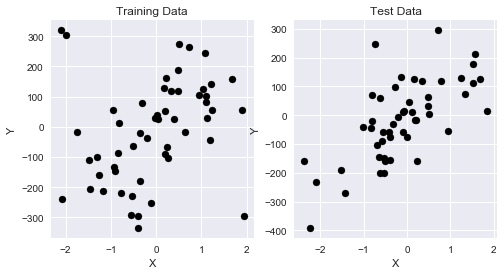

In [18]:
# read the data
train_df = pd.read_csv('data/outliers_train.csv')
test_df = pd.read_csv('data/outliers_test.csv')
plt.figure(figsize=(8,4))
plt.subplot(1,2,1, xlabel="X", ylabel="Y", title="Training Data")
plt.scatter(train_df.X, train_df.Y, c='k')
plt.subplot(1,2,2, xlabel="X", ylabel="Y", title="Test Data")
plt.scatter(test_df.X, test_df.Y, c='k')
plt.tight_layout


A qualitative visual inspection of the data suggests that there are definitely a few outliers in the training data but not the test data.

**4.2 Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create ... **

In [19]:
train_df = pd.read_csv('data/outliers_train.csv')
test_df = pd.read_csv('data/outliers_test.csv')
X = sm.add_constant(train_df.X)
OutlierOLSModel = OLS(train_df.Y, X)
OutlierOLSModel = OutlierOLSModel.fit()
OutlierOLSModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     4.689
Date:                Wed, 26 Sep 2018   Prob (F-statistic):             0.0351
Time:                        19:06:31   Log-Likelihood:                -343.59
No. Observations:                  53   AIC:                             691.2
Df Residuals:                      51   BIC:                             695.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.5063     22.192     -0.428      0.670     -54.059      35.046
X             47.3554     21.869      2.165      0.035       3.452      91.259
==============================================================================
Omnibus:                        2.102   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.350   Jarque-Bera (JB):                1.251
Skew:                           0.215   Prob(JB):                        0.535
Kurtosis:                       3.617   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**4.3 One potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?**
  
  

Let $n$ be the number of points in the training data set and $k=n-3$

Using a brute force method, we will have to calculate the linear regression coefficients for all the possible combinations of $k$ data points from the training set. We can calculate this as:

</br>

$${n \choose k} \quad = \quad \frac{n!}{k!(n-k)!}$$

</br>

The `scipy` package includes a nice implementation of this equation with the `comb` function.

In [20]:
from scipy.special import comb
n = len(train_df.X)
print("n = %i" % n)
print("k = %i" % (n-3))
num_combinations = comb(n,n-3)
print("combinations = %i" % num_combinations)

n = 53
k = 50
combinations = 23426


Being a lazy person with limited battery and processing power, $23,426$ is too many combinations to compute.

**4.4 CS109 hack ... **

In [21]:
import scipy as sp

def find_outliers_simple(x_data, y_data):
    
    X = sm.add_constant(x_data)
    OutlierOLSModel = OLS(train_df.Y, X)
    OutlierOLSModel = OutlierOLSModel.fit()
    predicted_y = OutlierOLSModel.predict(X)
    residuals = np.abs(y_data - predicted_y)
    sorted_residx = np.argsort(residuals)
    return(sorted_residx[-3:])

In [22]:
a = np.array([7,6,5,8,9,1,2])
b = np.argsort(a)
for i in range(1,len(a)):
    c = np.delete(a,b[-i:])
    print(c)

[7 6 5 8 1 2]
[7 6 5 1 2]
[6 5 1 2]
[5 1 2]
[1 2]
[1]


In [23]:
train_df = pd.read_csv('data/outliers_train.csv')
test_df = pd.read_csv('data/outliers_test.csv')

outlier_idx = find_outliers_simple(train_df.X, train_df.Y)
train_df = train_df.drop(outlier_idx)

X = sm.add_constant(train_df.X)
OutlierFreeSimpleModel = OLS(train_df.Y, X)
OutlierFreeSimpleModel = OutlierFreeSimpleModel.fit()
OutlierFreeSimpleModel.summary()
OutlierFreeSimpleModel.rsquared

0.4037060455958481

**4.5 Create a figure with two subplots: the first is a scatterplot ... **

(-600, 600)

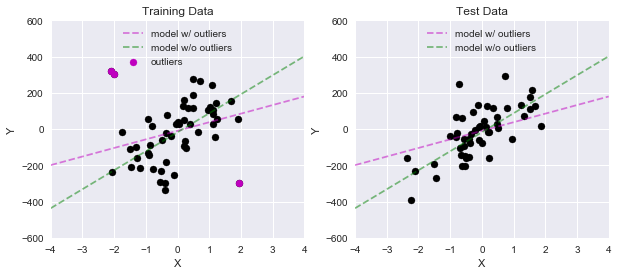

In [24]:
train_df = pd.read_csv('data/outliers_train.csv')
test_df = pd.read_csv('data/outliers_test.csv')

# first plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1, xlabel="X", ylabel="Y", title="Training Data")
plt.scatter(train_df.X, train_df.Y, c='k', label='')
plt.scatter(train_df.X[outlier_idx], train_df.Y[outlier_idx], c='m', label='outliers')
train_x = np.linspace(-4, 4, 10)
train_y = OutlierOLSModel.predict(sm.add_constant(train_x))
plt.plot(train_x, train_y, c='m', ls='--', alpha=0.5, label='model w/ outliers')
train_y = OutlierFreeSimpleModel.predict(sm.add_constant(train_x))
plt.plot(train_x, train_y, c='g', ls='--', alpha=0.5, label='model w/o outliers')
plt.legend(loc='upper center')
plt.xlim(-4,4)
plt.ylim(-600,600)

# second plot
plt.subplot(1,2,2, xlabel="X", ylabel="Y", title="Test Data")
plt.scatter(test_df.X, test_df.Y, c='k', label='')
test_x = np.linspace(-4, 4, 10)
test_y = OutlierOLSModel.predict(sm.add_constant(test_x))
plt.plot(test_x, test_y, c='m', ls='--', alpha=0.5, label='model w/ outliers')
test_y = OutlierFreeSimpleModel.predict(sm.add_constant(test_x))
plt.plot(test_x, test_y, c='g', ls='--', alpha=0.5, label='model w/o outliers')
plt.legend(loc='upper center')
plt.xlim(-4,4)
plt.ylim(-600,600)

The model without the outliers seems to fit the test data better.

**4.6  Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?**

In [25]:
pred_with_outliers = OutlierOLSModel.predict(sm.add_constant(test_df.X))
pred_without_outliers = OutlierFreeSimpleModel.predict(sm.add_constant(test_df.X))
r2_outlier = r2_score(test_df.Y, pred_with_outliers)
r2_outlier_free = r2_score(test_df.Y, pred_without_outliers)
print("OLS with outliers,\t R" + f'\N{SUPERSCRIPT TWO}' + "=%.2f\n" % r2_outlier)
print("OLS without outliers,\t R" + f'\N{SUPERSCRIPT TWO}' + "=%.2f\n" % r2_outlier_free)

OLS with outliers,	 R²=0.34

OLS without outliers,	 R²=0.45



The model without outliers produces a better $R^2$ score

**4.7 One potential problem with the brute force outlier detection approach in 4.3 and the heuristic algorithm you constructed 4.4 is that they assume prior knowledge of the number of outliers. **

If we look at the graph of $R^2$ as a function of the number of outliers removed, it should start to plateau or deteriorate at some point. We can start by graphing $R^2$ as a function of the number of outliers removed.

In [26]:
# re-initialize the data
train_df = pd.read_csv('data/outliers_train.csv')
test_df = pd.read_csv('data/outliers_test.csv')


# fit the naive model with no outliers removed and calulate residuals
x_data = train_df.X.values
y_data = train_df.Y.values
X = sm.add_constant(x_data)
OutlierOLSModel = OLS(y_data, X)
OutlierOLSModel = OutlierOLSModel.fit()
predicted_y = OutlierOLSModel.predict(X)
residuals = np.abs(y_data - predicted_y)
r2_vals = np.array([OutlierOLSModel.rsquared])
si = np.argsort(residuals)

for i in range(1,len(x_data)-2):

    tmp_x = np.delete(x_data, si[-i:])
    tmp_y = np.delete(y_data, si[-i:])

    X = sm.add_constant(tmp_x)
    TmpOutlierModel = OLS(tmp_y, X)
    TmpOutlierModel = TmpOutlierModel.fit()
    r2_vals = np.append(r2_vals,TmpOutlierModel.rsquared)



Text(0.5,0.98,'Effect of removing outliers on model fitness (training data)')

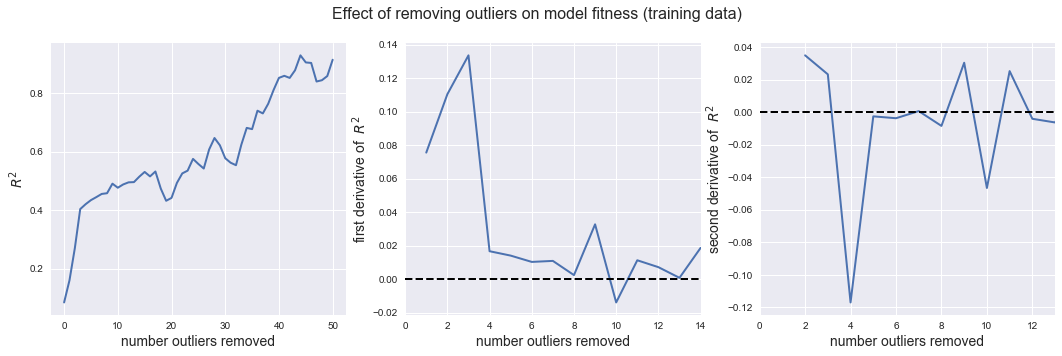

In [27]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.plot(np.arange(0,len(x_data)-2,1), r2_vals, lw=2)
plt.xlabel("number outliers removed", fontsize=14)
plt.ylabel("$R^2$", fontsize=14)

plt.subplot(1,3,2)
d2_r2 = np.diff(r2_vals[:15], n=1)
plt.plot(np.arange(1,len(d2_r2)+1,1), d2_r2, lw=2)
plt.plot([0,len(d2_r2)+1],[0,0], c='k', ls='--', lw=2)
plt.xlabel("number outliers removed", fontsize=14)
plt.ylabel("first derivative of  $R^2$", fontsize=14)
plt.xlim([0,len(d2_r2)])

plt.subplot(1,3,3)
d2_r2 = np.diff(r2_vals[:15], n=2)
plt.plot(np.arange(2,len(d2_r2)+2,1), d2_r2, lw=2)
plt.plot([0,len(d2_r2)+1],[0,0], c='k', ls='--', lw=2)
plt.xlabel("number outliers removed", fontsize=14)
plt.ylabel("second derivative of  $R^2$", fontsize=14)
plt.xlim([0,len(d2_r2)])

plt.gcf().suptitle("Effect of removing outliers on model fitness (training data)", fontsize=16) 

Based on the visualization above, it's clear that we can't simply maximize $R^2$ since the end result will be to just remove all of our data. One possibility would be to find the first inflection point in the curve (ie. first point where the second derivative goes negative). Another possibility would be to cut it off at the first point where the first derivative goes negative. The better of these two choices appears to be the second derivative, since this represents the most obvious trend in the line and could be considered the point at which we start receiving diminishing returns for removing data points from the training set.

In [28]:
def find_outliers_general(x_data, y_data):
    
    # fit the naive model with no outliers removed and calulate residuals
    X = sm.add_constant(x_data)
    OutlierOLSModel = OLS(y_data, X)
    OutlierOLSModel = OutlierOLSModel.fit()
    predicted_y = OutlierOLSModel.predict(X)
    residuals = np.abs(y_data - predicted_y)
    prev_r2 = OutlierOLSModel.rsquared
    si = np.argsort(residuals)

    for i in range(1,len(x_data)-2):
        
        # calculate temporary linear model with i outliers removed
        tmp_x = np.delete(x_data, si[-i:])
        tmp_y = np.delete(y_data, si[-i:])
        X = sm.add_constant(tmp_x)
        TmpOutlierModel = OLS(tmp_y, X)
        TmpOutlierModel = TmpOutlierModel.fit()
        tmp_r2 = TmpOutlierModel.rsquared
        
        # if second derivative of r-squared is less than negative
        if i>1:
            d2_r2 = (tmp_r2-prev_r2) - d1_r2 
            if d2_r2 < 0:
                break
        d1_r2 = tmp_r2 - prev_r2
        prev_r2 = tmp_r2
        

    print("identified %i outliers" % (i-1))
    return(si[-(i-1):])


**4.8 Run your algorithm in 4.7 on the training set data **

In [29]:
outlier_indices = find_outliers_general(train_df.X.values, train_df.Y.values)

identified 3 outliers


The outliers identified by the general approach are the same as with the brute force approach, and therefor the $R^2$ values will be as before. We can still plot them as a sanity check.

(-600, 600)

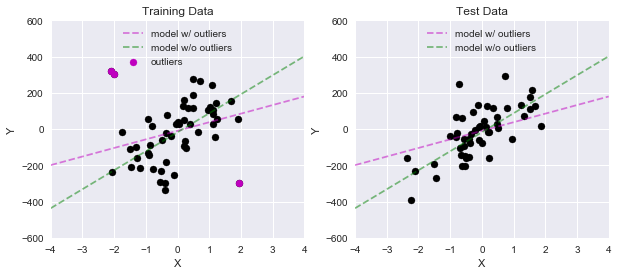

In [30]:
# re-initialize the data
train_df = pd.read_csv('data/outliers_train.csv')
test_df = pd.read_csv('data/outliers_test.csv')

# re-train the linear model using general approach above
train_df = train_df.drop(outlier_indices)

X = sm.add_constant(train_df.X)
OutlierFreeGeneralModel = OLS(train_df.Y, X)
OutlierFreeGeneralModel = OutlierFreeGeneralModel.fit()
OutlierFreeGeneralModel.summary()
OutlierFreeGeneralModel.rsquared

# re-initialize the data
train_df = pd.read_csv('data/outliers_train.csv')
test_df = pd.read_csv('data/outliers_test.csv')

# first plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1, xlabel="X", ylabel="Y", title="Training Data")
plt.scatter(train_df.X, train_df.Y, c='k', label='')
plt.scatter(train_df.X[outlier_indices], train_df.Y[outlier_indices], c='m', label='outliers')
train_x = np.linspace(-4, 4, 10)
train_y = OutlierOLSModel.predict(sm.add_constant(train_x))
plt.plot(train_x, train_y, c='m', ls='--', alpha=0.5, label='model w/ outliers')
train_y = OutlierFreeGeneralModel.predict(sm.add_constant(train_x))
plt.plot(train_x, train_y, c='g', ls='--', alpha=0.5, label='model w/o outliers')
plt.legend(loc='upper center')
plt.xlim(-4,4)
plt.ylim(-600,600)

# second plot
plt.subplot(1,2,2, xlabel="X", ylabel="Y", title="Test Data")
plt.scatter(test_df.X, test_df.Y, c='k', label='')
test_x = np.linspace(-4, 4, 10)
test_y = OutlierOLSModel.predict(sm.add_constant(test_x))
plt.plot(test_x, test_y, c='m', ls='--', alpha=0.5, label='model w/ outliers')
test_y = OutlierFreeSimpleModel.predict(sm.add_constant(test_x))
plt.plot(test_x, test_y, c='g', ls='--', alpha=0.5, label='model w/o outliers')
plt.legend(loc='upper center')
plt.xlim(-4,4)
plt.ylim(-600,600)

In [31]:
pred_with_outliers = OutlierOLSModel.predict(sm.add_constant(test_df.X))
pred_without_outliers = OutlierFreeGeneralModel.predict(sm.add_constant(test_df.X))
r2_outlier = r2_score(test_df.Y, pred_with_outliers)
r2_outlier_free = r2_score(test_df.Y, pred_without_outliers)
print("OLS with outliers,\t R" + f'\N{SUPERSCRIPT TWO}' + "=%.2f\n" % r2_outlier)
print("OLS without outliers,\t R" + f'\N{SUPERSCRIPT TWO}' + "=%.2f\n" % r2_outlier_free)

OLS with outliers,	 R²=0.34

OLS without outliers,	 R²=0.45



Checks out. All looks good.